In [7]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn

In [8]:
weight = .3
bias = .9

start = 0
end = 1
step = .02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = x*weight + bias

In [9]:
train_split = int(.8*len(x))
train_x, train_y = x[:train_split], y[:train_split] 
test_x, test_y = x[train_split:], y[train_split:] 
len(train_x), len(train_y), len(test_x), len(test_y)

(40, 40, 10, 10)

In [10]:
def plot_fn(tr_x=train_x, tr_y=train_y, te_x=test_x, te_y=test_y, pred_y=None):
    plt.figure(figsize=(10,7))
    plt.scatter(tr_x, tr_y, s=4, c="b", label="Training Data")
    plt.scatter(te_x, te_y, s=12, c="g", label="Test Data")
    if(pred_y!=None):
        plt.scatter(te_x, pred_y, s=6, c="r", label="Prediction Data")
    plt.legend(prop={"size":14})

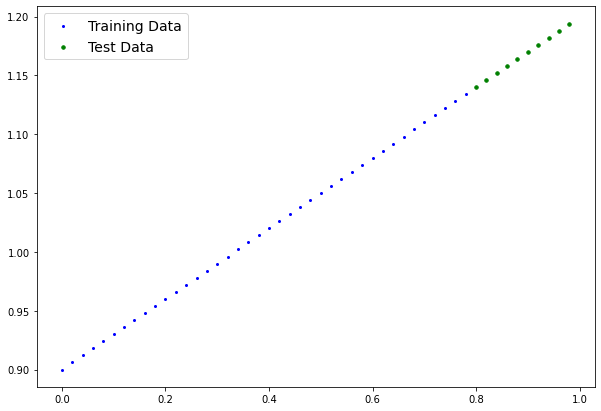

In [11]:
plot_fn()

In [12]:
class LRM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_2 = LRM()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [13]:
with torch.inference_mode():
    preds_y = model_2(test_x)
y_preds_old = preds_y.clone()
print(model_2.state_dict())


OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


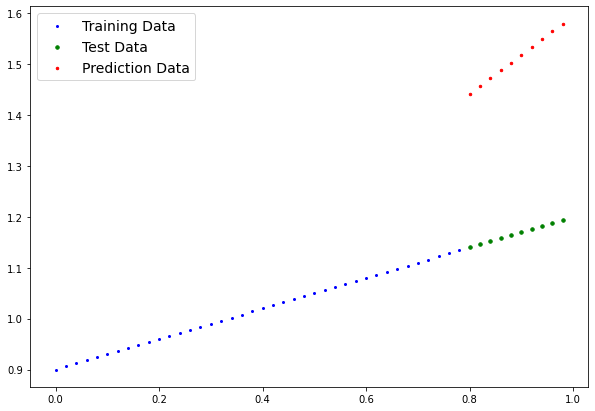

In [14]:
plot_fn(pred_y=y_preds_old)


In [15]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=.01)

In [27]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_2.train()
    pred_y = model_2(train_x)
    loss = loss_fn(pred_y, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    
    with torch.inference_mode():
        test_pred = model_2(test_x)
        test_loss = loss_fn(test_pred, test_y)
    
    if epoch%20 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")
        

Epoch: 0, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 20, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 40, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 60, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 80, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 100, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 120, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 140, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 160, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818
Epoch: 180, Loss: 0.007012799382209778, Test Loss: 0.003249275730922818


OrderedDict([('linear_layer.weight', tensor([[0.3064]])), ('linear_layer.bias', tensor([0.9045]))])


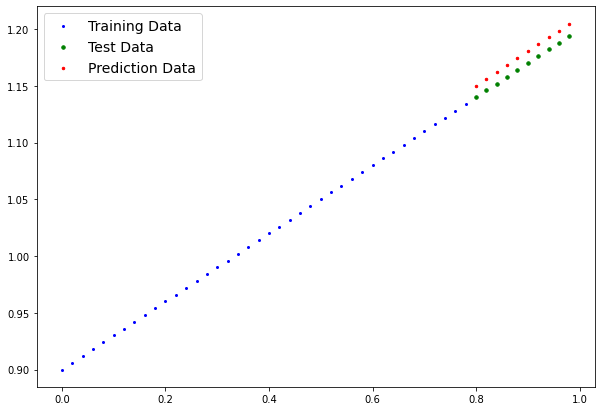

In [28]:
print(model_2.state_dict())
with torch.inference_mode():
    pred_y = model_2(test_x)
plot_fn( pred_y = pred_y)

In [29]:
from pathlib import Path
MODEL_PATH = Path("models") 
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [30]:
!ls -l models

total 24
-rw-r--r--  1 oleksandrburtyn  staff  1207 Feb  7 13:17 01_pytorch_workflow_model_0.pth
-rw-r--r--  1 oleksandrburtyn  staff  1271 Feb  7 13:17 01_pytorch_workflow_model_1.pth
-rw-r--r--  1 oleksandrburtyn  staff  1271 Feb  8 12:13 01_pytorch_workflow_model_2.pth


In [31]:
loaded_model_2 = LRM()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.3064]])),
             ('linear_layer.bias', tensor([0.9045]))])

In [34]:
with torch.inference_mode():
    loaded_model_preds = loaded_model_2(test_x)
    
loaded_model_preds
pred_y== loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])